<a href="https://colab.research.google.com/github/sagar234/NYC-Taxi-Trip-Time-Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction(Team_Notebook)_Capstone_Project_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

# Important pip install for calculating distance

In [ ]:
pip install haversine

In [ ]:
# importing important libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from datetime import  datetime
from sklearn import metrics
from haversine import haversine



import warnings; warnings.simplefilter('ignore')




import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reading csv file 
taxi = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NYC Taxi Data.csv')

In [ ]:
# take head of csv file
taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
# detail information about all variable
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


# In this dataset there is no Nan value

In [ ]:
# Handling missing value
taxi.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [ ]:
# looking what is data type
taxi.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

# Correlation between Independent variable and dependent variable

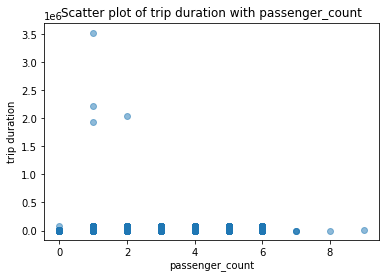

In [ ]:
plt.scatter(taxi['passenger_count'], taxi['trip_duration'], alpha=0.5)
plt.title('Scatter plot of trip duration with passenger_count')
plt.xlabel('passenger_count')
plt.ylabel('trip duration')
plt.show()

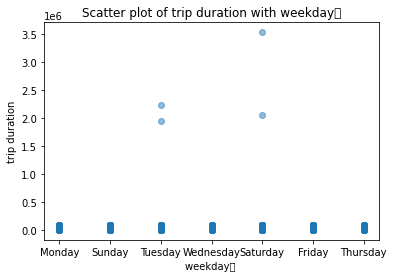

In [ ]:
plt.scatter(taxi['weekday'], taxi['trip_duration'], alpha=0.5)
plt.title('Scatter plot of trip duration with weekday	')
plt.xlabel('weekday	 ')
plt.ylabel('trip duration')
plt.show()

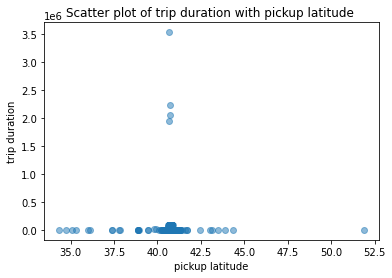

In [ ]:
plt.scatter(taxi['pickup_latitude'], taxi['trip_duration'], alpha=0.5)
plt.title('Scatter plot of trip duration with pickup latitude ')
plt.xlabel('pickup latitude')
plt.ylabel('trip duration')
plt.show()

In [ ]:
#Check count of unique id's in the dataset
print("There are %d unique id's in Training dataset, which is equal to the number of records"%(taxi.id.nunique()))

There are 1458644 unique id's in Training dataset, which is equal to the number of records


In [ ]:
#Convert timestamp to datetime format to fetch the other details as listed below
taxi['pickup_datetime'] = pd.to_datetime(taxi['pickup_datetime'])
taxi['dropoff_datetime'] = pd.to_datetime(taxi['dropoff_datetime'])

In [ ]:
#Calculate and assign new columns to the dataframe such as weekday,
#month and pickup_hour which will help us to gain more insights from the data.
taxi['weekday'] = taxi.pickup_datetime.dt.day_name()
taxi['month'] = taxi.pickup_datetime.dt.month
taxi['weekday_num'] = taxi.pickup_datetime.dt.weekday
taxi['pickup_hour'] = taxi.pickup_datetime.dt.hour

In [ ]:
def calc_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    drop = (df['dropoff_latitude'], df['dropoff_longitude'])
    return haversine(pickup, drop)

In [ ]:
#Calculate distance and assign new column to the dataframe.
taxi['distance'] = taxi.apply(lambda x: calc_distance(x), axis = 1)

In [ ]:
#Calculate Speed in km/h for further insights
taxi['speed'] = (taxi.distance/(taxi.trip_duration/3600))

In [ ]:
taxi.dtypes.reset_index()

,index,0
0,id,object
1,vendor_id,int64
2,pickup_datetime,datetime64[ns]
3,dropoff_datetime,datetime64[ns]
4,passenger_count,int64
5,pickup_longitude,float64
6,pickup_latitude,float64
7,dropoff_longitude,float64
8,dropoff_latitude,float64
9,store_and_fwd_flag,object


In [ ]:
#Dummify all the categorical features like "store_and_fwd_flag, vendor_id, month, weekday_num, pickup_hour, passenger_count" except the label i.e. "trip_duration"
dummy = pd.get_dummies(taxi.store_and_fwd_flag, prefix='flag')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
taxi = pd.concat([taxi,dummy], axis = 1)

dummy = pd.get_dummies(taxi.vendor_id, prefix='vendor_id')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
taxi = pd.concat([taxi,dummy], axis = 1)

dummy = pd.get_dummies(taxi.month, prefix='month')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
taxi = pd.concat([taxi,dummy], axis = 1)

dummy = pd.get_dummies(taxi.weekday_num, prefix='weekday_num')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
taxi = pd.concat([taxi,dummy], axis = 1)

dummy = pd.get_dummies(taxi.pickup_hour, prefix='pickup_hour')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
taxi = pd.concat([taxi,dummy], axis = 1)

dummy = pd.get_dummies(taxi.passenger_count, prefix='passenger_count')
dummy.drop(dummy.columns[0], axis=1, inplace=True) #avoid dummy trap
taxi = pd.concat([taxi,dummy], axis = 1)

In [ ]:
taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,month,weekday_num,pickup_hour,distance,speed,flag_Y,vendor_id_2,month_2,month_3,month_4,month_5,month_6,weekday_num_1,weekday_num_2,weekday_num_3,weekday_num_4,weekday_num_5,weekday_num_6,pickup_hour_1,pickup_hour_2,pickup_hour_3,pickup_hour_4,pickup_hour_5,pickup_hour_6,pickup_hour_7,pickup_hour_8,pickup_hour_9,pickup_hour_10,pickup_hour_11,pickup_hour_12,pickup_hour_13,pickup_hour_14,pickup_hour_15,pickup_hour_16,pickup_hour_17,pickup_hour_18,pickup_hour_19,pickup_hour_20,pickup_hour_21,pickup_hour_22,pickup_hour_23,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,passenger_count_8,passenger_count_9
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,3,0,17,1.498523,11.856445,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,6,6,0,1.805510,9.803672,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,1,1,11,6.385107,10.822216,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,4,2,19,1.485500,12.465738,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,3,5,13,1.188590,9.836608,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
# passenger count
taxi.passenger_count.value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

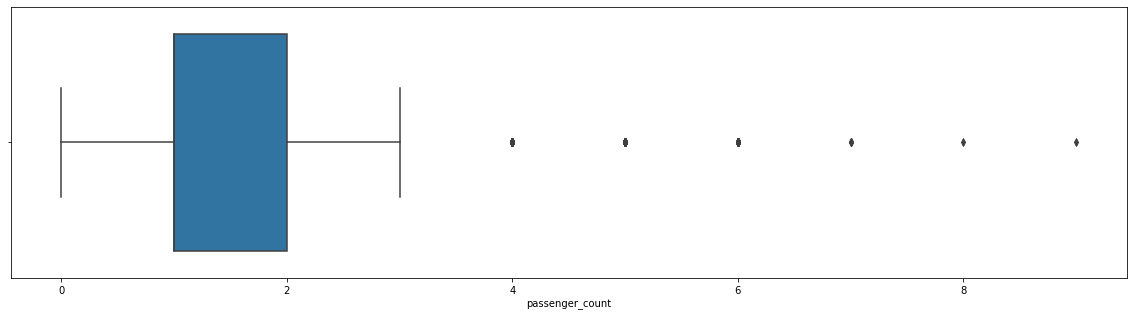

In [ ]:
plt.figure(figsize = (20,5))
sns.boxplot(taxi.passenger_count)
plt.show()

In [ ]:
taxi.passenger_count.describe()

count    1.458644e+06
mean     1.664530e+00
std      1.314242e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      9.000000e+00
Name: passenger_count, dtype: float64

In [ ]:
# for every 0 value in passenger replace by 1
taxi['passenger_count'] = taxi.passenger_count.map(lambda x: 1 if x == 0 else x)

In [ ]:
# removing from 7 to 9 
taxi = taxi[taxi.passenger_count <= 6]

In [ ]:
taxi.passenger_count.value_counts()

1    1033600
2     210318
5      78088
3      59896
6      48333
4      28404
Name: passenger_count, dtype: int64

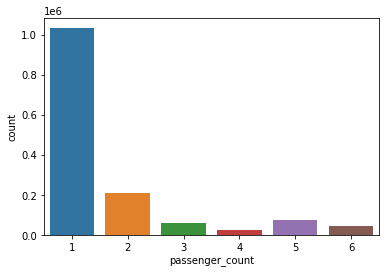

In [ ]:
sns.countplot(taxi.passenger_count)
plt.show()


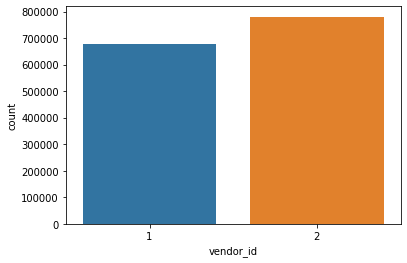

In [ ]:
sns.countplot(taxi.vendor_id)
plt.show()

In [ ]:
print(taxi.distance.describe())

count    1.458639e+06
mean     3.440876e+00
std      4.296547e+00
min      0.000000e+00
25%      1.231841e+00
50%      2.093727e+00
75%      3.875344e+00
max      1.240910e+03
Name: distance, dtype: float64


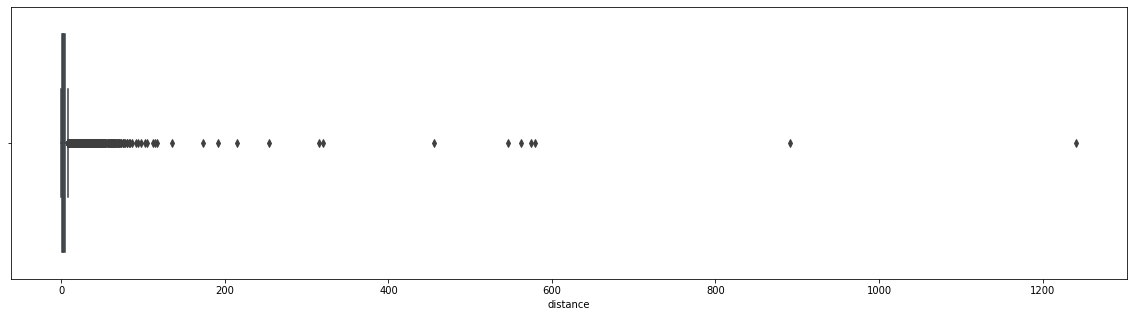

In [ ]:
plt.figure(figsize = (20,5))
sns.boxplot(taxi.distance)
plt.show()

In [ ]:
print("There are {} trip records with 0 km distance".format(taxi.distance[taxi.distance == 0 ].count()))

There are 5895 trip records with 0 km distance


# This would be se that is big outlier in this data set

In [ ]:
taxi[taxi.distance == 0 ].head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,month,weekday_num,pickup_hour,distance,speed,flag_Y,vendor_id_2,month_2,month_3,month_4,month_5,month_6,weekday_num_1,weekday_num_2,weekday_num_3,weekday_num_4,weekday_num_5,weekday_num_6,pickup_hour_1,pickup_hour_2,pickup_hour_3,pickup_hour_4,pickup_hour_5,pickup_hour_6,pickup_hour_7,pickup_hour_8,pickup_hour_9,pickup_hour_10,pickup_hour_11,pickup_hour_12,pickup_hour_13,pickup_hour_14,pickup_hour_15,pickup_hour_16,pickup_hour_17,pickup_hour_18,pickup_hour_19,pickup_hour_20,pickup_hour_21,pickup_hour_22,pickup_hour_23,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,passenger_count_8,passenger_count_9
246,id3487442,2,2016-02-29 18:39:12,2016-02-29 18:42:59,1,-73.981819,40.768963,-73.981819,40.768963,N,227,Monday,2,0,18,0.0,0.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
291,id0924324,2,2016-05-10 18:07:52,2016-05-10 18:26:21,2,-73.959068,40.775661,-73.959068,40.775661,N,1109,Tuesday,5,1,18,0.0,0.0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
407,id1145809,2,2016-05-16 23:15:13,2016-05-16 23:31:00,6,-73.808487,40.687336,-73.808487,40.687336,N,947,Monday,5,0,23,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
702,id3499387,1,2016-01-25 19:45:12,2016-01-25 19:54:52,1,-73.786720,40.647041,-73.786720,40.647041,N,580,Monday,1,0,19,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1620,id0753277,1,2016-01-27 22:29:31,2016-01-27 22:29:58,1,-74.209854,40.816853,-74.209854,40.816853,N,27,Wednesday,1,2,22,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [ ]:
taxi.trip_duration.value_counts()

In [ ]:
taxi.trip_duration.describe()

count    1.458639e+06
mean     9.594951e+02
std      5.237440e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

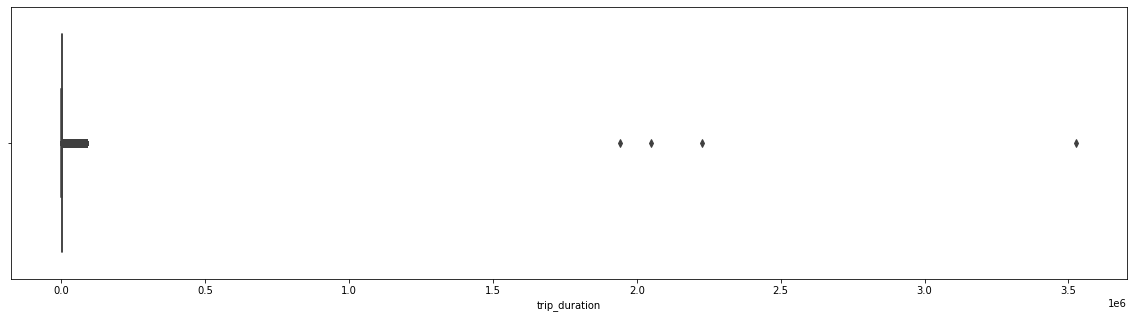

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(taxi['trip_duration'])
plt.show()


In [ ]:
# we look that which trip is more than 24 hours
taxi[taxi.trip_duration > 86400]

In [ ]:
# we look that which trip is less than 24 hours
taxi = taxi[taxi.trip_duration <= 86400]

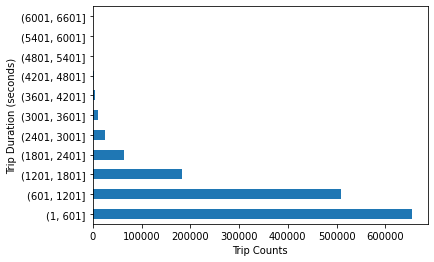

In [ ]:
# visualize the trip duration with trip counts
taxi.trip_duration.groupby(pd.cut(taxi.trip_duration, np.arange(1,7200,600))).count().plot(kind='barh')
plt.xlabel('Trip Counts')
plt.ylabel('Trip Duration (seconds)')
plt.show()

In [ ]:
taxi.speed.value_counts()

0.000000     5895
0.509011       15
0.169670        6
1.018021        6
0.763516        6
             ... 
14.373738       1
15.229433       1
8.932991        1
22.835324       1
10.534778       1
Name: speed, Length: 1452578, dtype: int64

In [ ]:
taxi.speed.describe()

count    1.458635e+06
mean     1.442318e+01
std      1.497671e+01
min      0.000000e+00
25%      9.121368e+00
50%      1.279202e+01
75%      1.784496e+01
max      9.274850e+03
Name: speed, dtype: float64

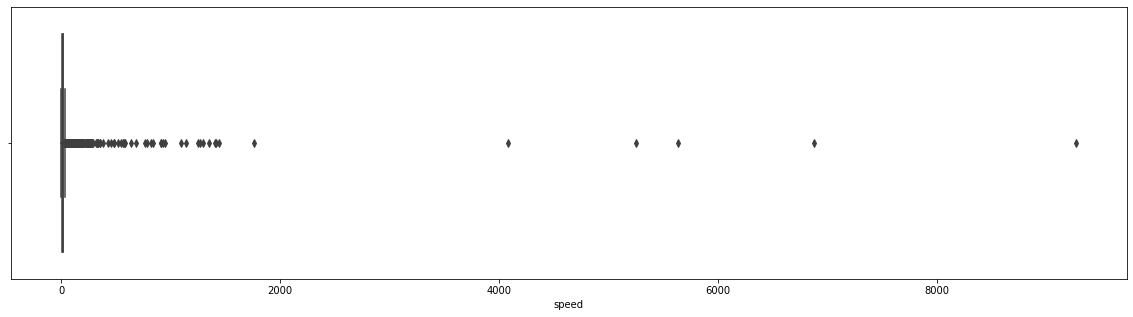

In [ ]:
plt.figure(figsize=(20,5))
sns.boxplot(taxi['speed'])
plt.show()

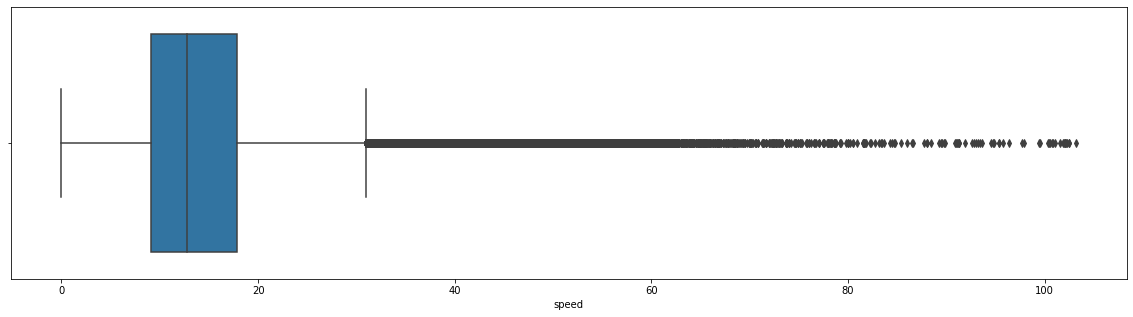

In [ ]:
# removing the speed is more than 200km/h
taxi = taxi[taxi.speed<=104]
plt.figure(figsize=(20,5))
sns.boxplot(taxi.speed)
plt.show()

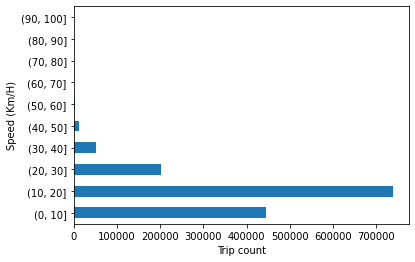

In [ ]:
# we take distribution of speed
taxi.speed.groupby(pd.cut(taxi.speed, np.arange(0,104,10))).count().plot(kind = 'barh')
plt.xlabel('Trip count')
plt.ylabel('Speed (Km/H)')
plt.show()


In [ ]:
taxi.store_and_fwd_flag.value_counts(normalize = True)

N    0.994485
Y    0.005515
Name: store_and_fwd_flag, dtype: float64

In [ ]:
taxi.store_and_fwd_flag.value_counts()

N    1450433
Y       8044
Name: store_and_fwd_flag, dtype: int64

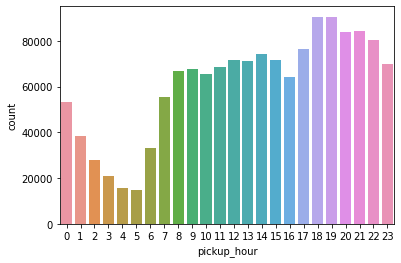

In [ ]:
sns.countplot(taxi.pickup_hour)
plt.show()

In [ ]:
taxi.month.value_counts()

3    256171
4    251619
5    248457
2    238276
6    234282
1    229672
Name: month, dtype: int64

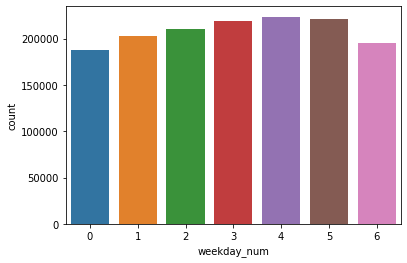

In [ ]:
sns.countplot(taxi.weekday_num)
plt.show()

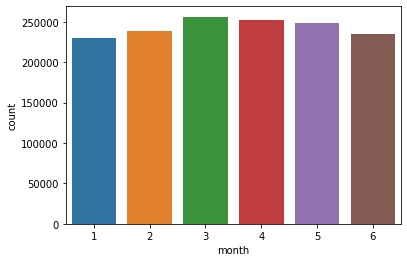

In [ ]:
sns.countplot(taxi.month)
plt.show()

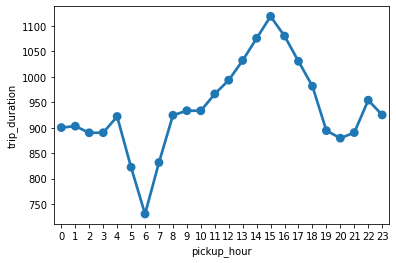

In [ ]:
# combination of two variable to see how many duration in pickup hour
combo = taxi.groupby('pickup_hour').trip_duration.mean()
sns.pointplot(combo.index,combo.values)
plt.ylabel('trip_duration')
plt.xlabel('pickup_hour')
plt.show()

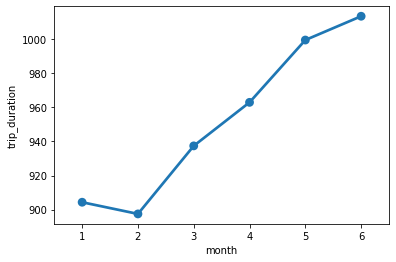

In [ ]:
# which month have most trip duration
combo1 = taxi.groupby('month').trip_duration.mean()
sns.pointplot(combo1.index,combo1.values)
plt.ylabel('trip_duration')
plt.xlabel('month')
plt.show()

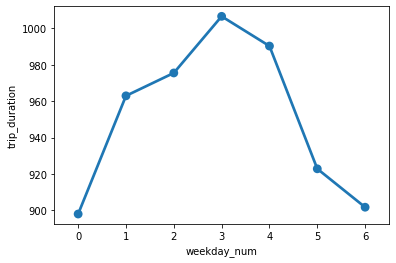

In [ ]:
# which weekday has more trip 
combo2 = taxi.groupby('weekday_num').trip_duration.mean()
sns.pointplot(combo2.index,combo2.values)
plt.ylabel('trip_duration')
plt.xlabel('weekday_num')
plt.show()

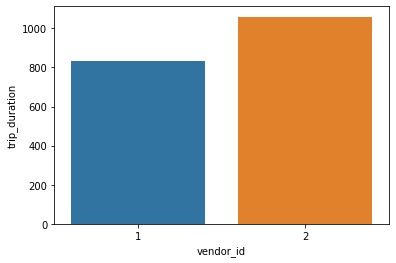

In [ ]:
# we see the average trip with vendor
combo3 = taxi.groupby('vendor_id').trip_duration.mean()
sns.barplot(combo3.index,combo3.values)
plt.ylabel('trip_duration')
plt.xlabel('vendor_id')
plt.show()

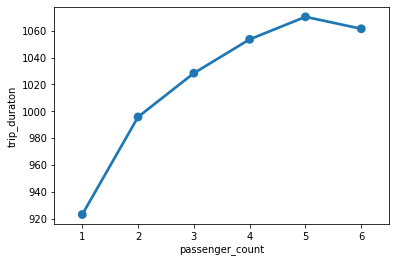

In [ ]:
# show 
combo4 = taxi.groupby('passenger_count').trip_duration.mean()
sns.pointplot(combo4.index,combo4.values)
plt.ylabel('trip_duraton')
plt.xlabel('passenger_count')
plt.show()

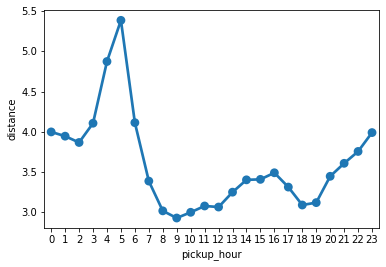

In [ ]:
combo5 = taxi.groupby('pickup_hour').distance.mean()
sns.pointplot(combo5.index,combo5.values)
plt.ylabel('distance')
plt.xlabel('pickup_hour')
plt.show()

# Now the time of to train our model first we take X and Y to train and split our model

In [ ]:
# list zip our coloums to get feature  for training and test  set
list(zip( range(0,len(taxi.columns)),taxi.columns))

In [ ]:
# give the value depended Y and independed X
Y = taxi.iloc[:,10].values
X = taxi.iloc[:,range(15,61)].values

In [ ]:
# Train and test split our model
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=4, test_size=0.2)

In [ ]:
#Linear regressor for the raw data
regressor = LinearRegression() 
regressor.fit(X_train,y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Predict from the test features of raw data
y_pred = regressor.predict(X_test) 

# Evaluation metrices

In [ ]:
print('RMSE score for the Multiple LR raw is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))
print('Variance score for the Multiple LR raw is : %.2f' % regressor.score(X_test, y_test))
print("\n")

RMSE score for the Multiple LR raw is : 3145.5627829313544
Variance score for the Multiple LR raw is : 0.06




In [ ]:
X_train.shape

(1166781, 46)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [ ]:
regressor_rfraw = RandomForestRegressor(n_jobs=-1)

#instantiate the object for the Random Forest Regressor with default params for Feature Selection Group
regressor_rf = RandomForestRegressor(n_jobs=-1)

# #instantiate the object for the Random Forest Regressor with tuned hyper parameters for Feature Selection Group
# regressor_rf1 = RandomForestRegressor(n_estimators = 26,
#                                      max_depth = 22,
#                                      min_samples_split = 9,
#                                      n_jobs=-1)

#instantiate the object for the Random Forest Regressor for Feature Extraction Group
regressor_rf2 = RandomForestRegressor(n_jobs=-1)


#Train the object with default params for raw data
regressor_rfraw.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred_rfraw_train = regressor_rfraw.predict(X_train)

In [ ]:
#Predict the output with object of default params for Feature Selection Group
y_pred_rfraw = regressor_rfraw.predict(X_test)

# Evaluation of metrices

In [ ]:
print('RMSE score for the RF regressor raw is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred_rfraw))))
print('RMSLE score for the RF regressor raw is : {}'.format(np.sqrt(metrics.mean_squared_log_error(y_test,y_pred_rfraw))))
print('Variance score for the RF regressor raw is : %.2f' % regressor_rfraw.score(X_test, y_test))

RMSE score for the RF regressor raw is : 275.51234040592493
RMSLE score for the RF regressor raw is : 0.12012351610417957
Variance score for the RF regressor raw is : 0.99


In [ ]:
r2_score(y_test , y_pred_rfraw)

0.9927830301998247

In [ ]:
r2_score(y_train , y_pred_rfraw_train)

0.9988623291982607

# Conclusion :

   #  This was the total model evaluation and training our model fit the data very well we coverd some machine learning algorithm to reach very good module we understand data very well and some EDA are done clean the data create some feature and reach our model to get fit response. If you see the above dataset 
# that we are analyzing there is no correlation between dependent and independet
# And there is also no multicollinearity in independent variable


